<h1>Project Title:Classsification of Podcast Articles using LDA and LSA</h1>
<h3> Contribution: Ashish Solanki,Rajaram Kuberan </h3>

<h2>Importing the python libraries</h1>

In [7]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')


import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import ldamodel
from gensim import matutils, models
import gensim.corpora;


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;
from gensim.models import CoherenceModel


import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

<h1> WebScrapped Data of Podcast Articles </h1>
<h2> The Data is collected from three different Websites</h2>
 

[Yoga Girl Podcast Website](https://www.yogagirl.com/podcast)

[Not Overthinking Website](https://notoverthinking.com/episodes)

[The Library of Economics and Liberty Website](https://www.econlib.org/articles/) 


In [9]:
# Import Dataset
import re
import numpy as np
import pandas as pd
from pprint import pprint
#df = pd.read_csv('tm_data.txt', delimiter = "\n", header=None)
df = pd.read_csv('https://raw.githubusercontent.com/rajaramkuberan/Modeling-and-Optimization-Under-Uncertainity-Coursework/main/Task_1_Topic_Modeling/2_Dataset/tm_data.txt', delimiter = "\n", header=None)
df

,0
0,"[01:21] Happy Friday, everyone, and welcome ba..."
1,"[01:21] Happy Thursday, everyone, and welcome ..."
2,[01:21] Happy Wednesday and welcome back to Yo...
3,"[01:20] Happy Tuesday, everyone, and welcome b..."
4,[01:21] Welcome back to Yoga Girl Daily and ha...
...,...
720,Economists famously argue about everything. Ev...
721,Why does the National Security Agency (NSA) sp...
722,"People often lament the waste, corruption, and..."
723,Which is more polluting—driving a mile to work...


In [10]:
# Convert to list
data = df.values.tolist()


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))


print(data_words[:1])


[['happy', 'friday', 'everyone', 'and', 'welcome', 'back', 'to', 'yoga', 'girl', 'daily', 'it', 'friday', 'today', 'we', 've', 'made', 'it', 'through', 'the', 'work', 'week', 'it', 'time', 'for', 'us', 'to', 'have', 'the', 'funnest', 'most', 'exciting', 'most', 'restful', 'most', 'nourishing', 'weekend', 'feel', 'like', 'setting', 'the', 'bar', 'really', 'high', 'for', 'these', 'two', 'days', 'ahead', 'but', 'why', 'not', 'today', 'for', 'our', 'feel', 'good', 'practice', 'have', 'fun', 'practice', 'for', 'you', 'this', 'is', 'something', 'that', 'just', 'happened', 'naturally', 'in', 'my', 'day', 'this', 'past', 'week', 'and', 'went', 'from', 'having', 'really', 'crappy', 'low', 'day', 'just', 'feeling', 'generally', 'blah', 'about', 'life', 'and', 'then', 'did', 'this', 'thing', 'which', 'is', 'so', 'simple', 'which', 'might', 'sound', 'superficial', 'to', 'some', 'people', 'it', 'doesn', 'for', 'me', 'but', 'simple', 'thing', 'and', 'it', 'turned', 'my', 'whole', 'mood', 'around', '

<h1> Build the bigram and trigram models </h1>

In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

<h1> Data Preprocessing </h1>

In [12]:
import spacy
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words) 

<h1> Before Topic Modelling Create Dictionary and Corpus<h1>

In [13]:
id2word = corpora.Dictionary(data_ready)

In [14]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

<h1> Build LDA Latent Dirilecht Allocation model</h1>

In [15]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


In [16]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [17]:
num_topics=4

In [18]:
get_lda_topics(lda_model, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04
0,feel,people,government,price
1,really,time,economist,economic
2,day,year,state,market
3,little,well,rate,cost
4,today,work,worker,increase
5,let,way,american,high
6,time,much,economy,money
7,thing,mean,policy,value
8,moment,first,individual,example
9,way,thing,result,percent


<h1>Visualization of data</h1>

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


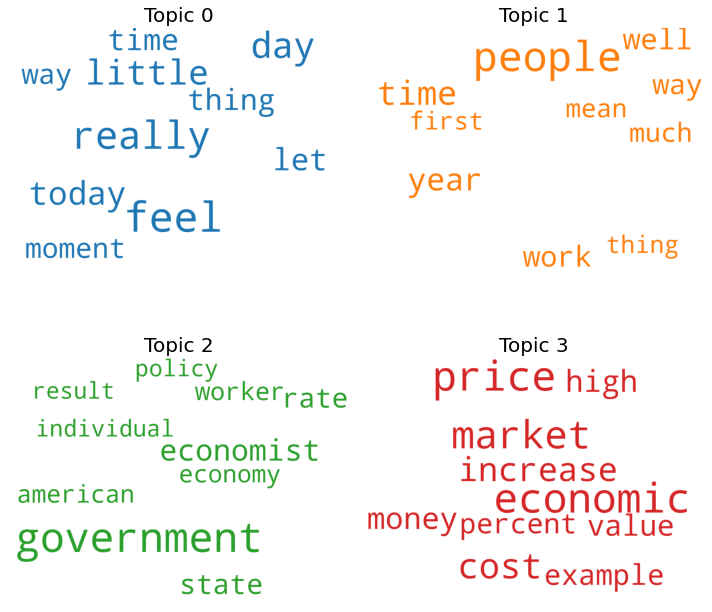

In [20]:
# 1. Wordcloud of Top 10 words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [21]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


<h1>T-SNE Clustring for 4 topics</h1>

In [22]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 719 samples in 0.004s...
[t-SNE] Computed neighbors for 719 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 719 / 719
[t-SNE] Mean sigma: 0.010731
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.083969
[t-SNE] KL divergence after 1000 iterations: 0.264827


Loading BokehJS ...

In [23]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.250380 -0.008264       1        1  45.678167
1      0.185445 -0.041371       2        1  34.847053
2     -0.262954 -0.203386       3        1  11.076066
3     -0.172871  0.253020       4        1   8.398713, topic_info=            Term         Freq        Total Category  logprob  loglift
40          feel  5187.000000  5187.000000  Default  30.0000  30.0000
96        people  3188.000000  3188.000000  Default  29.0000  29.0000
125        today  3120.000000  3120.000000  Default  28.0000  28.0000
4315  government  1088.000000  1088.000000  Default  27.0000  27.0000
29           day  3963.000000  3963.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
952        water   260.141398   730.183645   Topic4  -5.0283   1.4450
2165      demand   170.131512   274.036537   Topic4  -5.4529   2.0004
718        large   173.882203   312.647408   Topic4  -5.4311   1.8904
467          new   200.292499  1022.001711   Topic4  -5.2897   0.8474
46          free   167.019804   506.390925   Topic4  -5.4714   1.3679

[267 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2959      1  0.009718           accord
2959      4  0.981484           accord
2         1  0.879977         actually
2         2  0.119704         actually
3         1  0.998027            ahead
...     ...       ...              ...
1108      4  0.017762            write
273       1  0.195252             year
273       2  0.800625             year
273       4  0.003737             year
139       1  0.999788  yoga_girl_daily

[517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

<h1>LSA Latent Semantic Analysis</h1>

In [25]:
pip install textblob

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install sys

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys
Note: you may need to restart the kernel to use updated packages.


In [71]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
nltk.download('stopwords')

#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading BokehJS ...

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashishsolanki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
# Import Dataset
import re
import numpy as np
import pandas as pd
from pprint import pprint
df = pd.read_csv('tm_data.txt', delimiter = "\n", header=None)
raw_data = df[0]
raw_data

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [01:21] Happy Friday, everyone, and welcome ba...
1      [01:21] Happy Thursday, everyone, and welcome ...
2      [01:21] Happy Wednesday and welcome back to Yo...
3      [01:20] Happy Tuesday, everyone, and welcome b...
4      [01:21] Welcome back to Yoga Girl Daily and ha...
                             ...                        
720    Economists famously argue about everything. Ev...
721    Why does the National Security Agency (NSA) sp...
722    People often lament the waste, corruption, and...
723    Which is more polluting—driving a mile to work...
724    It is almost an article of faith among economi...
Name: 0, Length: 725, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


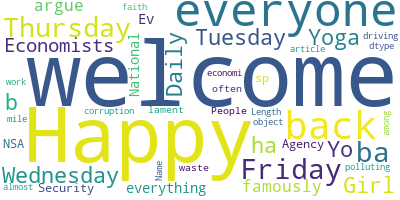

In [73]:
#Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='grey')
# Generate a word cloud
wordcloud.generate(str(raw_data))
# Visualize the word cloud
wordcloud.to_image()

In [74]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


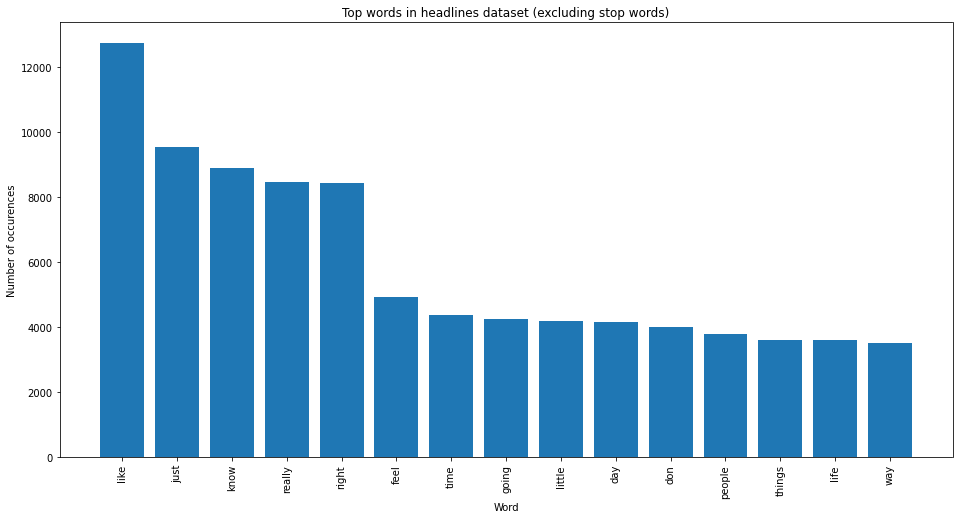

In [75]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=raw_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [76]:
tagged_headlines = [TextBlob(raw_data[i]).pos_tags for i in range(raw_data.shape[0])]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total number of words:  1465631
Mean number of words per headline:  2021.56


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


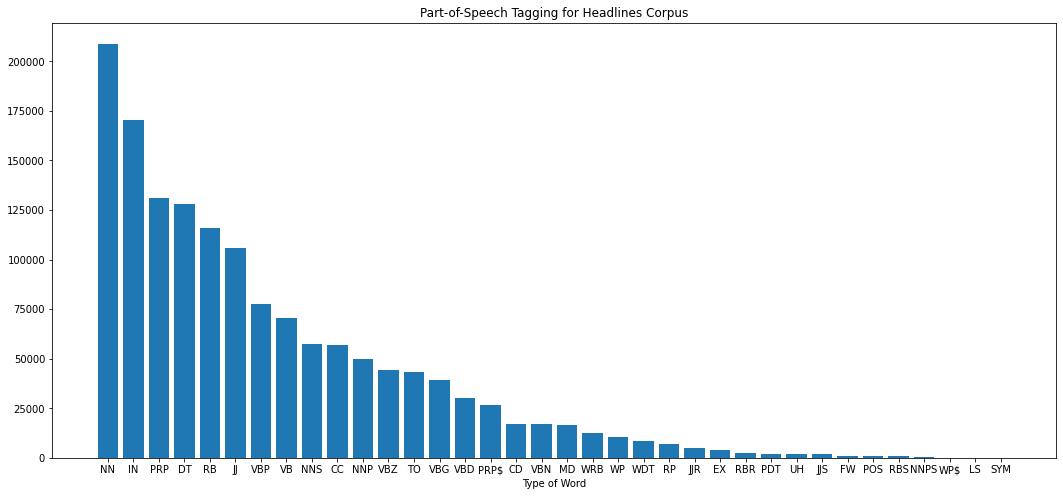

In [79]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

In [80]:
df.sample(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
443,[001:14] Hi and welcome to a brand new episode...
365,"[0:57] Rachel: Hi, and welcome to a brand new..."
635,"At their presidential campaign stops, U.S. Sen..."
632,"OOn September 4, Disney released Mulan on its ..."
604,Defining what it means to be weird is difficul...
113,[1:06] Welcome to a brand new episode of the ...
631,In a speech last November at Catholic Universi...
683,Economists use the term deadweight loss (DWL) ...
372,"[00:04] Welcome to Yoga Girl Daily, happy Frid..."
155,"[00:04] Welcome back to Yoga Girl Daily, happy..."


In [81]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = raw_data.sample(n=600, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Headline before vectorization: [01:21] Welcome back to Yoga Girl Daily and a very happy Friday to you! We've made it through an entire work week or whatever it is we're calling these kinds of weeks that we're all having right now. I really hope you get to have a clear distinction between work and play so you can enjoy this weekend. Today for our Feel-Good Friday practice, I have a practice in mind that was inspired by my daughter from something she did literally five minutes ago. Today we're going to take a little walk, just a little short walk in our neighborhood or in the woods by your house or around the city or wherever you are. Just go out for a little walk and we are going to pick ourselves a spring bouquet. I am really excited about this because I live in a part of the world where we can’t pick flowers. You know, I don't live in a part of the world where you can go out into the woods or go out into a field and find all of these beautiful flowers growing everywhere. We have cactu

In [82]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
clean_text=preprocess_data(document_list)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# LSA Model
import os.path
number_of_topics=4
words=10
document_list,titles=load_data("/Users/ashishsolanki/Desktop/","tm_data.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Number of Documents: 725
[(0, '0.529*"like" + 0.338*"know" + 0.239*"realli" + 0.232*"feel" + 0.226*"right" + 0.216*"go" + 0.183*"thing" + 0.125*"time" + 0.113*"think" + 0.111*"rachel"'), (1, '-0.527*"rachel" + -0.405*"like" + -0.389*"denni" + 0.222*"right" + 0.220*"feel" + -0.213*"yeah" + 0.160*"realli" + 0.119*"moment" + 0.108*"day" + -0.107*"laugh"'), (2, '-0.596*"like" + 0.465*"rachel" + 0.311*"denni" + 0.165*"yeah" + -0.162*"know" + 0.142*"year" + 0.100*"peopl" + 0.094*"realli" + 0.081*"think" + 0.078*"go"'), (3, '-0.279*"feel" + -0.272*"denni" + 0.251*"peopl" + 0.179*"would" + -0.153*"right" + 0.149*"govern" + -0.148*"bodi" + 0.144*"econom" + 0.133*"think" + -0.127*"moment"')]


In [86]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
dictionary,doc_term_matrix = prepare_corpus(clean_text)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
lsamodel = create_gensim_lsa_model(clean_text, 4, 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.529*"like" + 0.338*"know" + 0.239*"realli" + 0.232*"feel" + 0.226*"right" + 0.216*"go" + 0.183*"thing" + 0.125*"time" + 0.113*"think" + 0.111*"rachel"'), (1, '-0.527*"rachel" + -0.405*"like" + -0.389*"denni" + 0.222*"right" + 0.220*"feel" + -0.213*"yeah" + 0.160*"realli" + 0.119*"moment" + 0.108*"day" + -0.107*"laugh"'), (2, '0.596*"like" + -0.465*"rachel" + -0.311*"denni" + -0.165*"yeah" + 0.162*"know" + -0.142*"year" + -0.100*"peopl" + -0.094*"realli" + -0.081*"think" + -0.078*"go"'), (3, '0.279*"feel" + 0.272*"denni" + -0.251*"peopl" + -0.179*"would" + 0.153*"right" + -0.149*"govern" + 0.148*"bodi" + -0.144*"econom" + -0.133*"think" + 0.127*"moment"')]


In [90]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()